In [3]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow import  keras
import cv2 as cv
import matplotlib.pyplot as plt
import os 
##Reading MAP Data
import pickle
dbfile1 = open('mapping_data5', 'rb')      
db1 = pickle.load(dbfile1) 
dbfile1.close() 
maps=dict(db1)
model = keras.models.load_model('Model v6.0 ACC -84.h5')


rev_map={}
for key,pairs in maps.items():
    rev_map[pairs]=key

import operator
# list l passed to the below function is list of dictionaries
def remove_repeat(lis):
    lis.sort(key=operator.itemgetter('x'))
    #print(lis)
    #print("Starting loop")
    for i in range(0,len(lis)-1):
        #print("Value of i is "+str(i))
        sum1 = lis[i]['x'] + lis[i]['w']
        sum2 = lis[i+1]['x'] + lis[i+1]['w']
        if lis[i+1]['x'] >= lis[i]['x'] and sum2 <= sum1 :
            #print("Satisfied")
            lis.remove(lis[i+1])
            remove_repeat(lis)
            break
    return lis
#example list below , in below 2nd dictionary (box) lies in 1st dictionary(box)    

def Predict(d):
    counter=0
    X=[]
    target=[]
    ans=[]
    kernel = np.ones((2,2),np.uint8)
    i=0
    try:
        image_data=[]
        image_test= cv.imread(d)
        hsv = cv.cvtColor(image_test, cv.COLOR_BGR2HSV)
        lower_green = np.array([0,0,0])
        upper_green = np.array([180, 255, 130])
        hsv_out = cv.inRange(hsv, lower_green, upper_green)
        cv.imwrite("test_hsv.jpg",hsv_out)
        im= cv.imread('test_hsv.jpg')
        imgray = cv.cvtColor(im,cv.COLOR_BGR2GRAY)
        ret,thresh = cv.threshold(imgray,127,255,0)
#        thresh=cv.erode(thresh,kernel,iterations = 1)
#        thresh=cv.dilate(thresh,kernel,iterations = 1)
        contours,_ = cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
        img = cv.drawContours(im, contours, -1, (0,255,0), 1)
        dk=0
        for c in contours:
            (x, y, w, h) = cv.boundingRect(c)
            if w>2 and h>10:
                dk+=1
                data_image=cv.resize(imgray[y:y+h,x:x+w],dsize=(28,28))
                image_data.append({'x':x,'y':y,'w':w,'h':h , 'data':data_image})
        image_data = remove_repeat(image_data)
        image_data = sorted(image_data,key = lambda k: k['x'])
        print("Prediction:" , end=' ')
        for _ in image_data:
            cv.rectangle(image_test, (_['x'],_['y']), (_['x']+_['w'],_['y']+_['h']), (255, 0, 0), 1)
            im = np.array(_['data'])
            im = im.reshape(-1,28,28,1)
            ans.append(rev_map[np.argmax(model.predict(im))])
            print(rev_map[np.argmax(model.predict(im))],end='')
        plt.imshow(image_test)
        plt.title(d)
        plt.show()
        return ''.join(ans)
    except Exception as e:
        print(e)
        print('error with','test'+str(d)+'.jpeg')

https://14.139.110.183/geca/CaptchaImage.axd?guid=225f8ae5-c77f-4ed9-be3f-9a82c1e693c0
https://14.139.110.183/geca/CaptchaImage.axd?guid=225f8ae5-c77f-4ed9-be3f-9a82c1e693c0
Prediction: bea7a

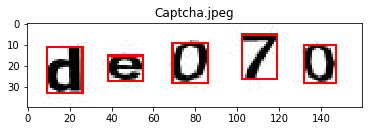

bea7a
Alert Text: Entered captcha character not match. Please enter characters as shown in captcha image.
Message: unexpected alert open: {Alert text : Entered captcha character not match. Please enter characters as shown in captcha image.}
  (Session info: chrome=77.0.3865.90)

Connection Error


In [6]:
from selenium import webdriver 
import urllib.request
import requests
import time
from selenium.webdriver.common.keys import Keys 
from bs4 import BeautifulSoup 
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

driver = webdriver.Chrome("//home//sherrinford//Documents//Captcha Cracker V2.0//chromedriver")
driver.get("https://14.139.110.183/geca/") 
try:
    images = driver.find_elements_by_tag_name('img')
    lst = []
    for image in images:
        lst.append(image.get_attribute('src'))
    src = lst[-1]
    print(src) 
    #src =  "https://14.139.110.183/geca/" + src
    print(src)
    image_url =src
    r = requests.get(image_url) # create HTTP response object 
    with open("Captcha.jpeg",'wb') as f: 
        f.write(r.content) 
    time.sleep(1)
    usname = 'BE17F06F044'
    pswd = '2456@usher!'
    username = driver.find_element_by_id("txt_username")
    password = driver.find_element_by_id("txt_password")
    captcha_input = Predict('Captcha.jpeg')
    print(captcha_input)
    captcha = driver.find_element_by_id("txtCapcha")
    username.send_keys(usname)
    password.send_keys(pswd)
    captcha.send_keys(captcha_input)
    login_attempt = driver.find_element_by_id("btnSubmit")
    login_attempt.click()
    time.sleep(5)
    ################ !! Entered Login !! ###############
    page = driver.page_source
    soup = BeautifulSoup(page, 'html5lib')
    linkkk = soup.findAll('ul')
    first_ul = linkkk[0]
    tst_ul = first_ul.find_all('ul')
    #print(tst_ul[2])    
    target_li = tst_ul[2].find_all('li')
    ele = target_li[1]
    #print(ele.prettify())
    ee = ele.find_all('a')
    tar = ee[0]['href']
    #tar = "14.139.110.183/GECA/"+tar
    tar = 'https://14.139.110.183/GECA/' + tar
    driver.get(tar)
    time.sleep(3)

    ##################### !! Entered into student details search !! #####################
    time.sleep(3)
    page = driver.page_source
    soup1 = BeautifulSoup(page, 'html5lib')
    cont = soup1.find_all('div',class_='content-wrapper')
    tab = soup1.find_all('table',class_ ='table table-hover table-bordered') 
    target = tab[1]    
    content = target.find_all('tbody')
    trs = content[0].find_all('tr')    
    report = []

    for j in trs:
        temp = []
        for u in j.find_all('td'):
            temp.append(u.text.strip())
        report.append(temp)    
    for i in range(len(report)):
        print(report[i])
        print("\n")
except Exception as e:
    print(e)
    print("Connection Error")

else:
    print("Success !")

In [5]:
from selenium import webdriver 
#import urllib.request
import requests
import time
from selenium.webdriver.common.keys import Keys 
from bs4 import BeautifulSoup 
from selenium.webdriver.common.by import By
from selenium.common.exceptions import UnexpectedAlertPresentException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow import  keras
import cv2 as cv
import matplotlib.pyplot as plt
import os 
##Reading MAP Data
import pickle
dbfile1 = open('mapping_data5', 'rb')      
db1 = pickle.load(dbfile1) 
dbfile1.close() 
maps=dict(db1)
model = keras.models.load_model('Model v6.0 ACC -84.h5')


rev_map={}
for key,pairs in maps.items():
    rev_map[pairs]=key

import operator
# list l passed to the below function is list of dictionaries
def remove_repeat(lis):
    lis.sort(key=operator.itemgetter('x'))
    #print(lis)
    #print("Starting loop")
    for i in range(0,len(lis)-1):
        #print("Value of i is "+str(i))
        sum1 = lis[i]['x'] + lis[i]['w']
        sum2 = lis[i+1]['x'] + lis[i+1]['w']
        if lis[i+1]['x'] >= lis[i]['x'] and sum2 <= sum1 :
            #print("Satisfied")
            lis.remove(lis[i+1])
            remove_repeat(lis)
            break
    return lis
#example list below , in below 2nd dictionary (box) lies in 1st dictionary(box)    

def Predict(d):
    counter=0
    X=[]
    target=[]
    ans=[]
    kernel = np.ones((2,2),np.uint8)
    i=0
    try:
        image_data=[]
        image_test= cv.imread(d)
        hsv = cv.cvtColor(image_test, cv.COLOR_BGR2HSV)
        lower_green = np.array([0,0,0])
        upper_green = np.array([180, 255, 130])
        hsv_out = cv.inRange(hsv, lower_green, upper_green)
        cv.imwrite("test_hsv.jpg",hsv_out)
        im= cv.imread('test_hsv.jpg')
        imgray = cv.cvtColor(im,cv.COLOR_BGR2GRAY)
        ret,thresh = cv.threshold(imgray,127,255,0)
#        thresh=cv.erode(thresh,kernel,iterations = 1)
#        thresh=cv.dilate(thresh,kernel,iterations = 1)
        contours,_ = cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
        img = cv.drawContours(im, contours, -1, (0,255,0), 1)
        dk=0
        for c in contours:
            (x, y, w, h) = cv.boundingRect(c)
            if w>2 and h>10:
                dk+=1
                data_image=cv.resize(imgray[y:y+h,x:x+w],dsize=(28,28))
                image_data.append({'x':x,'y':y,'w':w,'h':h , 'data':data_image})
        image_data = remove_repeat(image_data)
        image_data = sorted(image_data,key = lambda k: k['x'])
        print("Prediction:" , end=' ')
        for _ in image_data:
            cv.rectangle(image_test, (_['x'],_['y']), (_['x']+_['w'],_['y']+_['h']), (255, 0, 0), 1)
            im = np.array(_['data'])
            im = im.reshape(-1,28,28,1)
            ans.append(rev_map[np.argmax(model.predict(im))])
            print(rev_map[np.argmax(model.predict(im))],end='')
        plt.imshow(image_test)
        plt.title(d)
        plt.show()
        return ''.join(ans)
    except Exception as e:
        print(e)
        print('error with','test'+str(d)+'.jpeg')


def getscore(tot,pre,att):
    cnt = 0
    if att>=75:
        while att>=75:
            tot = tot + 1
            att = (pre*100)/tot
            if att >= 75:
                cnt = cnt+1
    elif att<75:
        while True:
            tot = tot+1
            pre = pre + 1
            att = (pre*100)/tot
            cnt = cnt+1
            if att>=75:
                break
    return cnt
def login(flag):
    prev_url = driver.current_url
    print(prev_url)
    usname =input("Enter Your USERID:")
    pswd = input("Enter Your Password:")
    username = driver.find_element_by_id("txt_username")
    password = driver.find_element_by_id("txt_password")
    
    #### !!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Ummair please your code here !!!!!!!!!!!!!!!!!!!!!!!!!!
    
    images = driver.find_elements_by_tag_name('img')
    lst = []
    for image in images:
        lst.append(image.get_attribute('src'))
    src = lst[-1]
    print(src) 
    #src =  "https://14.139.110.183/geca/" + src
    print(src)
    image_url =src
    r = requests.get(image_url) # create HTTP response object 
    with open("Captcha.jpeg",'wb') as f: 
        f.write(r.content)
    
    captcha_input = Predict('Captcha.jpeg')
    captcha = driver.find_element_by_id("txtCapcha")
    if flag==0:
        username.send_keys(usname)
    password.send_keys(pswd)
    captcha.send_keys(captcha_input)
    login_attempt = driver.find_element_by_id("btnSubmit")
    login_attempt.click()
    time.sleep(3)
    try:
        WebDriverWait(driver, 5).until(EC.alert_is_present(),'Timed out waiting for PA creation ' +'confirmation popup to appear.')
        alert = driver.switch_to.alert
        alert.accept()
        print("Login unsucessful! Please provide correct credentials !!!!")
        login(flag)
    except TimeoutException:
        print("!!! Login Successful !!!")
if __name__=='__main__':
    flag=0
    driver = webdriver.Chrome("//home//sherrinford//Documents//Captcha Cracker V2.0//chromedriver")
    try:
        driver.get("https://14.139.110.183/geca/")
    except:
        print('Oops, Something went wrong, Please make sure that you have a working internet connection !!!')
    else:
        login(flag)
        flag=1
        print("\t\t===================================== Fetching your Attendence Details ==================================\n")
        page = driver.page_source
        soup = BeautifulSoup(page, 'html5lib')
        linkkk = soup.findAll('ul')
        first_ul = linkkk[0]
        tst_ul = first_ul.find_all('ul')
        #print(tst_ul[2])    
        target_li = tst_ul[2].find_all('li')
        ele = target_li[1]
        #print(ele.prettify())
        ee = ele.find_all('a')
        tar = ee[0]['href']
        #tar = "14.139.110.183/GECA/"+tar
        tar = 'https://14.139.110.183/GECA/' + tar
        driver.get(tar)
        time.sleep(3)

        ##################### !! Entered into student details search !! #####################
        time.sleep(3)
        page = driver.page_source
        soup1 = BeautifulSoup(page, 'html5lib')
        cont = soup1.find_all('div',class_='content-wrapper')
        tab = soup1.find_all('table',class_ ='table table-hover table-bordered') 
        target = tab[1]    
        content = target.find_all('tbody')
        trs = content[0].find_all('tr')    
        report = []

        for j in trs:
            temp = []
            for u in j.find_all('td'):
                temp.append(u.text.strip())
            report.append(temp) 

        desc = ['Subject : ','Teacher : ','Total lectures : ','Present : ','un','Attendance : ']    
        print("\tXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX\n\tXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX Attendance Report XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX\n\tXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX\n\n\n")
        for i in range(len(report)):
            for j in range(len(report[i])):
                if j!=4:
                    print("\t\t\t",end='')
                    print(desc[j],report[i][j])
            cnt = getscore(int(report[i][2]),int(report[i][3]),int(report[i][5]))
            if int(report[i][5])>=75:
                print("\n\t\tYou can afford to bunk "+str(cnt)+" lectures")
            else:
                print("\n\t\tYou need to attend next "+str(cnt)+" lectures to restore your attendance back to 75%")

            print("\n\txxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n")  


https://14.139.110.183/geca/


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[id="txt_username"]"}
  (Session info: chrome=77.0.3865.90)
